### Classification:
It is a type of problem where we predict whether something belong to this category or other.

### Dataset:
Today we using mnist digit dataset to build a deep learning model which classify these hand written images

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
# Load Dataset
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [36]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Image shape is 28*28 pixels

In [5]:
# Check labels
y_train[0]

5

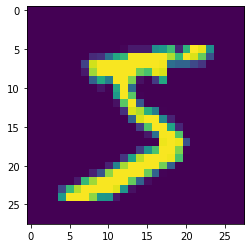

In [6]:
# Display the image on index 0

plt.imshow(X_train[0])
plt.show()

ok so the above digit is 5

# Prepare the Dataset

In [37]:
# We have to reshape the data to propagate into hidden layers

# Shape : (600000,784)
X_train_reshaped = tf.reshape(X_train, shape=[X_train.shape[0],28*28])
X_train_reshaped

<tf.Tensor: shape=(60000, 784), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [38]:
X_test_reshaped = tf.reshape(X_test, shape=[X_test.shape[0],28*28])
X_test_reshaped.shape

TensorShape([10000, 784])

# Lets build a Deep learning Model to classify these digits

In [39]:
model1 = tf.keras.Sequential([
                             
          tf.keras.layers.Dense(100,input_shape=[28*28]), # define 100 neurons on first hidden layer
          tf.keras.layers.Dense(50), # 50 neurons at 2nd layer
          tf.keras.layers.Dense(10, activation='softmax') # 10 ouput neurons
          
])

## Before compilation and training Model let me clarify some terms for you.



> Activation Function: The function which we help us to build the mapping between inputs and output on nodes. It could be Linear or Non Linear.
Types of Activation Function are:

1.   Linear
2.   Sigmoid (Binary Classification)
3.   Relu    (replacing negative numbers with zeros)
4.   Softmax (for multiclass classification)


In these we use softmax because we have 10 classes







In [40]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

We use Sparse Categorical cross entropy when we have more than 2 classes.

In [41]:
model1.fit(X_train_reshaped, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 8.2413 - accuracy: 0.8436
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9425 - accuracy: 0.8486
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4544 - accuracy: 0.8475
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0936 - accuracy: 0.8551
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8141 - accuracy: 0.8646
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6530 - accuracy: 0.8701
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5330 - accuracy: 0.8766
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5091 - accuracy: 0.8770
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4406 - accuracy: 0.8852
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.418

Accuracy is pretty good on training lets check it on test set

In [42]:
model1.evaluate(X_test_reshaped,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8997


[0.3624632954597473, 0.8996999859809875]

Ahaan it is nice :)



> Other ways to evaluate model we will use confusion matrix



In [45]:
y_pred = model1.predict(X_test_reshaped)
y_pred

array([[2.11177621e-06, 3.55023649e-11, 5.56646410e-06, ...,
        9.95184600e-01, 1.84990295e-05, 1.44881924e-04],
       [1.31362246e-08, 2.62026113e-11, 9.99679446e-01, ...,
        9.06975511e-21, 4.25005098e-09, 4.59573897e-18],
       [3.16056969e-07, 9.87077951e-01, 6.09658146e-03, ...,
        6.44437503e-04, 1.89603458e-03, 1.09382272e-04],
       ...,
       [6.41923226e-09, 2.27161891e-05, 4.47521188e-06, ...,
        2.04530341e-04, 4.25835192e-01, 1.08559236e-01],
       [7.02198855e-10, 1.48250390e-08, 2.67350098e-09, ...,
        2.21962310e-11, 4.68508061e-03, 3.69735975e-09],
       [1.86433202e-09, 1.05980132e-13, 7.87318584e-08, ...,
        4.86918448e-13, 5.43555999e-11, 7.55672087e-12]], dtype=float32)

In [52]:
y_pred_labels = [np.argmin(y) for y in y_pred]
y_pred_labels[:10]

[6, 4, 0, 1, 3, 0, 2, 0, 3, 2]

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_labels)
print(cm)

[[  0 846   3  10  73   0  12  30   0   6]
 [810   0   0   0 307   0   8  10   0   0]
 [ 72 168   1   4 387  25  38 248   0  89]
 [ 73   8  12   0 381   2 355 171   1   7]
 [346 175 124 274   0  21   9  33   0   0]
 [ 10 202  65   2  97   0  91 405   0  20]
 [ 95 118   0 131   4  34   0 547   6  23]
 [ 70  83  45   0   3  10 817   0   0   0]
 [168 106   2  10 105   1 118 462   0   2]
 [389 225 114  38   4  43 195   1   0   0]]


### Visualize the Confusion Matrix

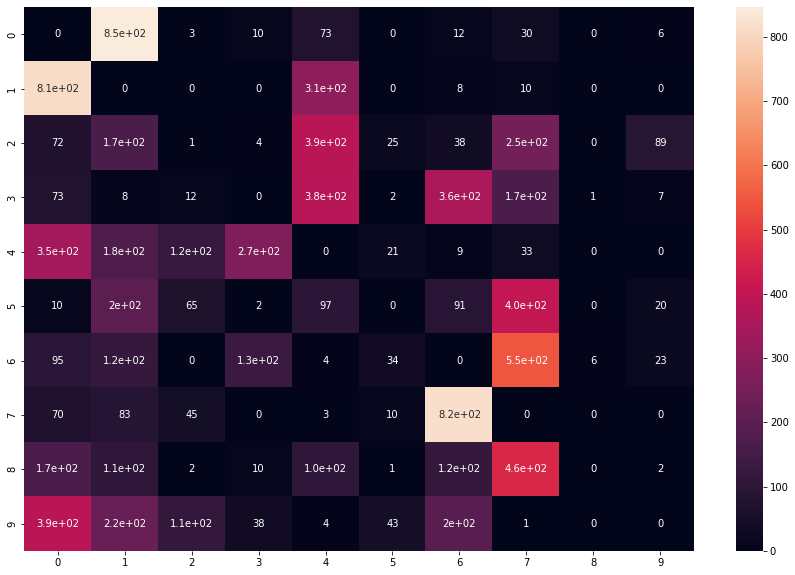

In [55]:
import seaborn as sns

plt.figure(figsize=(15,10))

sns.heatmap(cm,annot=True)
plt.show()



> Lets build another and improved model to achieve more accuracy by adding more layers and some hyperparamters tunning and by normalizing the Data.



### Normalize the Data

In [56]:
X_train_norm = X_train_reshaped/255
X_test_norm = X_test_reshaped/255

### Build Model

In [60]:
model2 = tf.keras.Sequential([
          tf.keras.layers.Dense(200,input_shape=[28*28],activation='relu'),
          tf.keras.layers.Dense(100,activation='relu'),
          tf.keras.layers.Dense(50,activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax'),
          

])

model2.compile(loss= tf.losses.SparseCategoricalCrossentropy(), optimizer=tf.optimizers.SGD(), metrics=['accuracy'])

In [61]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 200)               157000    
                                                                 
 dense_18 (Dense)            (None, 100)               20100     
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model2.fit(X_train_norm, y_train, epochs=50, validation_data=(X_test_norm,y_test))

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6395 - accuracy: 0.8225 - val_loss: 0.3010 - val_accuracy: 0.9109
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2659 - accuracy: 0.9225 - val_loss: 0.2216 - val_accuracy: 0.9341
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2065 - accuracy: 0.9398 - val_loss: 0.1844 - val_accuracy: 0.9457
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1693 - accuracy: 0.9497 - val_loss: 0.1515 - val_accuracy: 0.9550
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1427 - accuracy: 0.9584 - val_loss: 0.1394 - val_accuracy: 0.9581
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1225 - accuracy: 0.9647 - val_loss: 0.1279 - val_accuracy: 0.9609
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1079 - accuracy: 0.9689 - val_loss: 0.1115 - val_accura

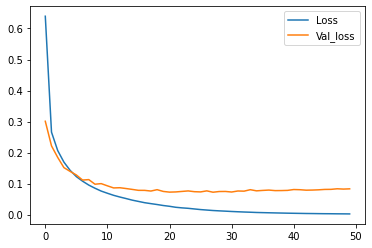

In [67]:
# plot the loss

plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_loss')

plt.legend()
plt.show()

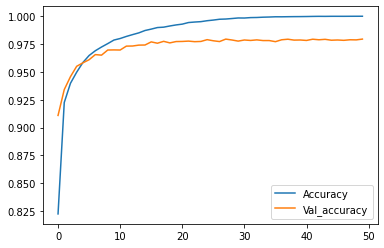

In [69]:
# Plot accuracy

plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_accuracy')

plt.legend()
plt.show()

For futher reading: 
https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/